## Analyze coverage_matrix. Either create coverage_matrix from scratch or load from csv

In [1]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
from cnv import utilities as cnv_util
from cnv import coverage_matrix as cm
import pandas as pd
from genepeeks.common import utilities as util
import pysam

INFO:config:Using ini file from: /Users/msilver/genepeeks-science/genepeeks/common/../../conf/genepeeks.ini


#### Create coverage_matrix_df

In [6]:
reload(cnv_util)
reload(cm)
targets = cnv_util.combine_panel_intervals()
bamfiles_fofn = '/Users/msilver/Dropbox (GenePeeks)/Max_workspace/dmd/cnv/inputs/bamfile_paths.fofn'
matrix_instance = cm.CoverageMatrix()
cm_df = matrix_instance.create_coverage_matrix(bamfiles_fofn, targets)

TSO only: 1659 intervals over 356192 bp
TSID only: 122 intervals over 135550 bp

Creating coverage_matrix with 6 subjects
------------------------------------------------------------


Returned 1247 merged intervals after merging 412 of them within 629 of each other
Returned 114 merged intervals after merging 8 of them within 629 of each other


Time per 1 unit/s: 4.29 sec, Counts: 1/6
TE: 4.29 sec, ETR: 21.43 sec, ETT: 25.71 sec 
----------------------------------------
Time per 1 unit/s: 6.67 sec, Counts: 2/6
TE: 10.95 sec, ETR: 21.91 sec, ETT: 32.86 sec 
----------------------------------------
Time per 1 unit/s: 5.79 sec, Counts: 3/6
TE: 16.75 sec, ETR: 16.75 sec, ETT: 33.49 sec 
----------------------------------------
Time per 1 unit/s: 6.39 sec, Counts: 4/6
TE: 23.14 sec, ETR: 11.57 sec, ETT: 34.71 sec 
----------------------------------------
Time per 1 unit/s: 5.18 sec, Counts: 5/6
TE: 28.32 sec, ETR: 5.66 sec, ETT: 33.98 sec 
----------------------------------------
Total time for 6 entries: 30.28 sec
............................................................
365 reads were skipped from: not a proper pair
3 reads were skipped from: negative insert_length
355 reads were skipped from: MAPQ below 60
821 reads were skipped from: pair_end is less than reference_end
183 reads were skipped from: mate_is_unmapped
328 reads

In [3]:
cm_df['all_targets'] = cm_df.filter(regex=('Ex|Target')).sum(axis=1)

#### Alternatively, load the coverage_matrix from csv

In [23]:
cm_df = pd.read_csv("../exon_data/coverage_matrix.csv", index_col=0)

In [4]:
cm_df.filter(regex=('baits|TSID_ratio')).groupby('baits').describe()

TSID_ratio
baits                  
M     count    4.000000
      mean     0.299427
      std      0.010394
      min      0.290601
      25%      0.293904
      50%      0.296361
      75%      0.301884
      max      0.314384
P     count    2.000000
      mean     0.994874
      std      0.001203
      min      0.994023
      25%      0.994448
      50%      0.994874
      75%      0.995299
      max      0.995724

#### Plot the distribution of TSID ratios across mixin panels

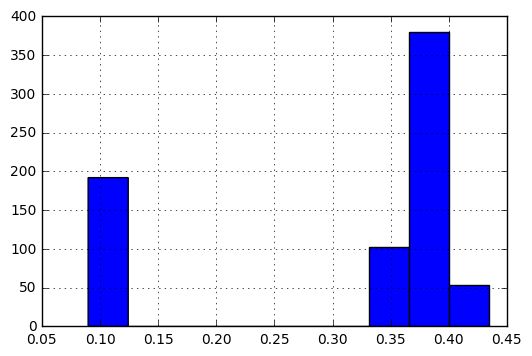

In [83]:
cm_df[cm_df['sequencer'] == 'M1']['TSID_ratio'].hist()

#### Look at which subjects appear to have been falsely labeled as inherited disease when the data indicates that they were really run on TruSight One

In [71]:
cm_df[(cm_df['sequencer'] == 'P1') & (cm_df['TSID_ratio'] < 0.9)].filter(regex=('subject|sequencer|TSID_ratio'))

,subject,sequencer,TSID_ratio
21,FPWB-0000-429L,P1,0.001606
462,FPWB-0000-865H,P1,0.002161
512,FPWB-0001-075V,P1,0.002322
731,FPWB-0000-780R,P1,0.002393
747,FPWB-0001-098N,P1,0.001663
754,FPWB-0001-1042,P1,0.001384
779,FPWB-0001-069O,P1,0.002183
995,FPWB-0001-0820,P1,0.001973


#### Add columns for summed coverage across all exons

#### Print summary stats for each exon across all female subjects

In [7]:
females_only = cm_df[cm_df['gender'] == 'F']
females_only.filter(regex=('Ex|Target|all_targets')).describe().T

,count,mean,std,min,25%,50%,75%,max
Ex1,5.0,724.2,198.443191,529.0,562.0,725.0,781.0,1024.0
Ex2,5.0,110.4,27.808272,76.0,98.0,102.0,129.0,147.0
Ex3,5.0,272.6,55.877545,203.0,230.0,293.0,294.0,343.0
Ex4,5.0,442.2,46.235268,378.0,425.0,439.0,468.0,501.0
Ex5,5.0,186.2,33.907226,163.0,169.0,176.0,177.0,246.0
Ex6,5.0,293.2,57.790138,213.0,252.0,322.0,332.0,347.0
Ex7,5.0,430.4,76.290891,350.0,355.0,451.0,470.0,526.0
Ex8,5.0,391.0,75.686855,307.0,312.0,423.0,454.0,459.0
Ex9-10,5.0,707.2,119.944571,586.0,608.0,676.0,819.0,847.0
Ex11,5.0,255.2,51.799614,207.0,213.0,239.0,290.0,327.0
